# X-ray Image Classification

In [11]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [12]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# setting the training data directory
DataDir = r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/train/"

In [14]:
# intiallizing the category of classification
CATEGORIES = ["NORMAL", "PNEUMONIA"]

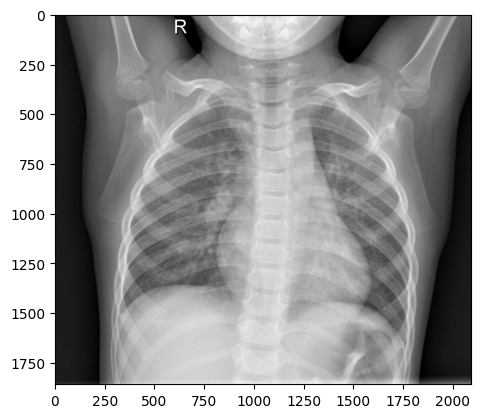

In [15]:
# converting the images into grayscale
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [16]:
# intializing the size of the image so that every image should be in same dimension
img_size=100

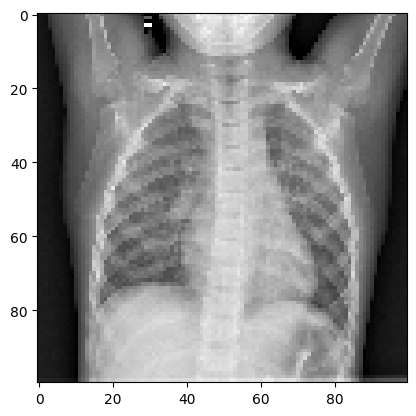

In [17]:
# image after resize and gray scale
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [18]:
training_data=[]

In [19]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100 
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [20]:
create_training_data()

In [21]:
print(len(training_data))

5226


In [22]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[  2,   2,   9, ...,   0,   0,   0],
       [  2,   5,  19, ...,   0,   0,   0],
       [  1, 252, 163, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[ 44,  68,  83, ..., 143, 139, 145],
       [ 43,  65,  87, ..., 143, 142, 144],
       [ 43,  66,  82, ..., 142, 139, 137],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[  0,   0,   0, ...,   2,   0,   1],
       [  0,   0,   0, ..., 222,   4, 254],
       [  0,   0,   0, ...,  13,   8, 252],
       ...,
       [  0,   0,   0, ...,   0,   1, 255],
       [  0,   0,   0, ...,   3,   6, 247],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[ 19,  11,   9, ..., 212, 227, 236],
       [ 23,  21,  22, ..., 218, 230, 232],
       [ 21,  19,  21, ...

In [23]:
X=[]
y=[]

In [24]:
# spliting the features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

In [25]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[  2]
   [  2]
   [  9]
   ...
   [  0]
   [  0]
   [  0]]

  [[  2]
   [  5]
   [ 19]
   ...
   [  0]
   [  0]
   [  0]]

  [[  1]
   [252]
   [163]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]]


In [26]:
y = np.array(y)

In [27]:
# reshapping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [28]:
# as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/val"

In [29]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [30]:
create_validating_data()
print(len(validation_data))

16


In [31]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[  0,   0,   0, ...,   6,   6,   6],
       [  0,   0,   0, ...,   6,   6,   6],
       [  0,   0,   0, ...,   6,   6,   6],
       ...,
       [  3,   3,   3, ..., 222,  51,   7],
       [  3,   3,   3, ..., 190,  58,  10],
       [  3,   4,   4, ...,  48,  14,   9]], dtype=uint8), 1]
[array([[ 2, 17, 31, ..., 95, 86, 68],
       [ 6, 14, 25, ..., 94, 68, 62],
       [ 2, 10, 23, ..., 88, 73, 60],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[0, 1, 3, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1]
[array([[10, 32, 26, ..., 71, 64, 56],
       [11, 38, 35, ..., 79, 68, 61],
       [13, 37, 38, ..., 81, 76, 66],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, 

In [32]:
X_val=[]
y_val=[]

In [33]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [34]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [35]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D
import pickle

In [36]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
X = X/255.0
x_val = X_val/255.0

In [37]:
X.shape

(5226, 100, 100, 1)

In [38]:
x_val.shape

(16, 100, 100, 1)

In [39]:
# intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [40]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 128)       0         
                                                        

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1307/1307 [==============================] - 19s 6ms/step - loss: 0.2822 - accuracy: 0.8940 - val_loss: 0.3534 - val_accuracy: 0.8750
Epoch 2/10
1307/1307 [==============================] - 10s 8ms/step - loss: 0.1637 - accuracy: 0.9390 - val_loss: 0.7035 - val_accuracy: 0.7500
Epoch 3/10
1307/1307 [==============================] - 8s 6ms/step - loss: 0.1341 - accuracy: 0.9508 - val_loss: 0.1259 - val_accuracy: 0.9375
Epoch 4/10
1307/1307 [==============================] - 8s 6ms/step - loss: 0.1177 - accuracy: 0.9577 - val_loss: 0.3560 - val_accuracy: 0.8125
Epoch 5/10
1307/1307 [==============================] - 9s 7ms/step - loss: 0.0954 - accuracy: 0.9646 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 6/10
1307/1307 [==============================] - 8s 6ms/step - loss: 0.0914 - accuracy: 0.9656 - val_loss: 0.1441 - val_accuracy: 0.9375
Epoch 7/10
1307/1307 [==============================] - 8s 6ms/step - loss: 0.0852 - accuracy: 0.9730 - val_loss: 0.2086 - val_accurac

In [43]:
# saving the model
model.save(r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5")

In [44]:
# importing the library for testing the model
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [45]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

In [46]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [47]:
model = tf.keras.models.load_model("/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5")

In [48]:
image = r'/content/drive/MyDrive/X-Ray Image Classification/chest_xray/test/NORMAL/IM-0059-0001.jpeg'

In [49]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 [==============================] - 0s 204ms/step
[[0.00506247]]
0
NORMAL


In [50]:
image2 = r'/content/drive/MyDrive/X-Ray Image Classification/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'


In [51]:
prediction=model.predict([prepare(image2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 [==============================] - 0s 18ms/step
[[0.9999784]]
1
PNEUMONIA


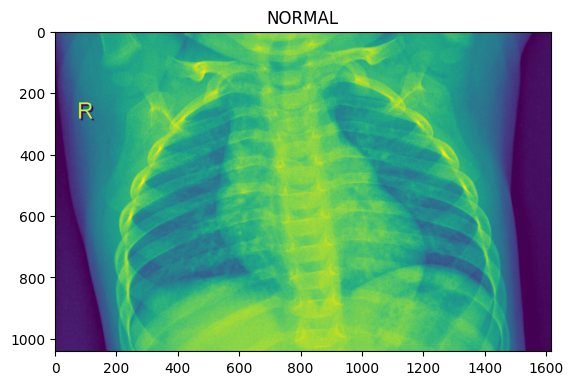

In [52]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [53]:
# importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

# set the path for test data
test_dir = "/content/drive/MyDrive/X-Ray Image Classification/chest_xray/test"

# define categories
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set image size
img_size = 100

# load the saved model
model = load_model('/content/drive/MyDrive/X-Ray Image Classification/chest_xray/model_10.h5')

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the images and their labels
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            X_test.append(new_array)
            y_test.append(class_num)
        except Exception as e:
            pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test / 255.0

# calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# print test accuracy
print('Test accuracy:', test_acc)


20/20 - 1s - loss: 1.1134 - accuracy: 0.7548 - 741ms/epoch - 37ms/step
Test accuracy: 0.754807710647583


## Pre-Trained Models

In [ ]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define image size
img_size = 100

# load the pre-trained model (VGG16)
base_model = VGG16(input_shape=(img_size,img_size,3), include_top=False, weights='imagenet')

# freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# define the image generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# specify the training and validation data directories
train_dir = '/content/drive/MyDrive/X-Ray Image Classification/chest_xray/train'
val_dir = '/content/drive/MyDrive/X-Ray Image Classification/chest_xray/val'

# create the image generators for training and validation data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary')

# train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)

# evaluate the model on test data
test_dir = '/content/drive/MyDrive/X-Ray Image Classification/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Found 5226 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
164/164 [==============================] - 85s 489ms/step - loss: 0.2096 - accuracy: 0.9148 - val_loss: 0.2230 - val_accuracy: 0.9375
Epoch 2/10
164/164 [==============================] - 78s 478ms/step - loss: 0.1589 - accuracy: 0.9405 - val_loss: 0.9243 - val_accuracy: 0.6250
Epoch 3/10
164/164 [==============================] - 79s 483ms/step - loss: 0.1472 - accuracy: 0.9443 - val_loss: 0.5617 - val_accuracy: 0.7500
Epoch 4/10
164/164 [==============================] - 78s 475ms/step - loss: 0.1291 - accuracy: 0.9493 - val_loss: 0.2745 - val_accuracy: 0.8750
Epoch 5/10
164/164 [==============================] - 80s 491ms/step - loss: 0.1248 - accuracy: 0.9531 - val_loss: 0.2888 - val_accuracy: 0.8750
Epoch 6/10
164/164 [==============================] - 77s 473ms/step - loss: 0.1221 - accuracy: 0.9539 - val_loss: 0.2367 - val_accuracy: 0.8750
Epoch 7/10
164/164 [============================

In [ ]:
# saving the pre-trained model
model.save(r"/content/drive/MyDrive/X-Ray Image Classification/chest_xray/custom_pre_trained_model_10.h5")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/X-Ray Image Classification/chest_xray/custom_pre_trained_model_10.h5")

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
# evaluate the model on test data
test_dir = '/content/drive/MyDrive/X-Ray Image Classification/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 8s 324ms/step - loss: 0.2372 - accuracy: 0.9103
Test accuracy: 0.9102563858032227
